# Implementing logistic Regression from scratch

# Generating the Dataset

Steps:
1. Generate 500 random points (using numpy)within a reasonable range, say suppose X1 and X2 values between -5 and 5
2. Label the datapoints based on line equation y=0.5x+1 .Points above this line will be labelled 1 and points below will be 
    labelled as 0
3. add noise to the dataset
4. visulalization

In [5]:
import numpy as np  # numpy for generating the random values
import matplotlib.pyplot as plt  # matplotlib.pyplot for visualization

# Parameters 
samples=500  # Total number of samples
noise_factor=0.2  # How much noise to add to the data points 

# Generate random X values ranging from -5 to 5
X1=np.random.uniform(-5,5,samples)# rnadom.uniform(low,high,size) will generate uniformly distrbuted values betwn low and high
X2=np.random.uniform(-5,5,samples)


# Label the datapoints based on line equation y=0.5x+1 which is our decision boundary. Here we generate the Actual Labels .
y=(X2>(0.5*X1+1))
# Here we checked if  point (X1,X2) lies above or below the decision line  the decision boundary 
#𝑦=0.5𝑋1+1, assigning True (1) for above and False (0) for below.

''''• Imagine drawing the line X2=0.5X1+1X2 = 0.5X1 + 1X2=0.5X1+1 on a graph.
    • Pick a random point, say (2,3).
	○ The line predicts X2=0.5(2)+1=2X2 = 0.5(2) + 1 = 2X2=0.5(2)+1=2.
	○ Since the actual X2=3X2 = 3X2=3 (which is greater than 2), the point is above the line.
    • Pick another point, say (2,1).
	○ The line predicts X2=2X2 = 2X2=2, but the actual X2=1X2 = 1X2=1 (which is less than 2), so the point is below the line.
So, the condition X2 > (0.5*X1 + 1) classifies points into Class 1 (above the line) and Class 0 (below the line) automatically.'''

# Since the noise in real world data mostly follows a normal distribution (ie most values cluster around the mean(loc) with
# some variance)
# Adding noise to the X1 and X2 values

X1+=np.random.normal(0,noise_factor,samples) # add noise that is centered around 0 and has random variance. 
X2+=np.random.normal(0,noise_factor,samples)

# random.normal(loc,scale,size) generates values from a normal guassian distribution with a mean(loc) and a std deviation(scale)


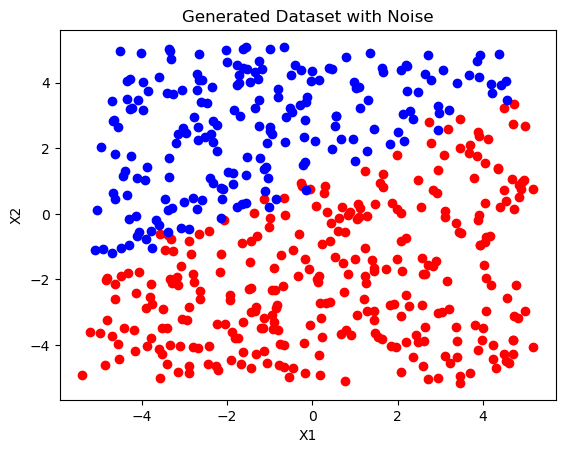

In [6]:
# Visulizing the dataset

plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0') # X1 and X2 values with label 0 will be red color
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')# X1 and X2 values with label 1 will be blue color
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Dataset with Noise')
plt.show()



# Implementing Perceptron Update Logic

Steps for the Perceptron Update:
1. Initilize the weights (W0,W1,W2) randomly .
2. Loop through the data for specific number of epochs
3. For each point :
    - Calculate y-predicted using the decision function ypred = W0 + W1X1 + W2X2.
    - If the weights are misclassified update the wieghts using the perceptron rule 
4. Repeat the process until we get a good classification boundary
5. After training visualize the decision boundary to see how well the perceptron learned to separate the classes .

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# initialize parameters 
learning_rate=0.1
epoch=1000

# Initilize the weights W0, W1 and W2
weights=np.random.randn(3) # random.randn(start,stop,shape) generates random  array from the Normal Standard Distribution 
                        # where mean=0 and standard deviation=1 . So this array generates values between 0 and 1.

In [8]:
weights

array([0.26823347, 2.20617495, 1.45239433])

In [9]:
# Add column of 1's to represent the bias term W0 in the data
X_data=np.vstack((np.ones(samples),X1,X2)).T # vertically stack 1's which represent the bias term W0 ,X1 and X2 input variables
# This will create a 3*n matrix so to convert it into n*3 matrix we use T for transpose.
print(X_data)


[[ 1.         -1.46601105  4.01884308]
 [ 1.         -0.47626655  3.11808079]
 [ 1.          1.00352661 -1.39196212]
 ...
 [ 1.          4.30533071 -4.71509443]
 [ 1.          1.62611236 -3.81391767]
 [ 1.         -0.93351862  2.44211022]]


# Perceptron Algorithm

In [10]:
for e in range(epoch):
    for i in range(samples):
        x_point=X_data[i] # will return 1 row from X_data for example [ 1. -4.69676702  1.71492169] ie. [1 X1 X2]
        y_true=y[i]  # y-true is the actual label for the data point
        
        y_pred=np.dot(weights,x_point) # this is just another way to write the decision function ypred= W0 + W1X1 + W2X2
        # so the dot product of weights and x points will be (W0,W1,W2)(1,X1,X2) == W0 + W1X1 + W2X2. 
        # Why do we use this? since it is more effiecient... no need to update the parameters manually and flexible in case of
        # more parameters. Note: y_pred values will be a real number and they won't be between -1, 0 and 1.
        
        # Check if the data point is misclassified or not . If misclassified then update the weights
        # Case 1: If the model predicted Positive but the actual value is Negative 
        # Case 2: If the model predicted Negative but the actual value is Positive
        
        if(y_pred>=0 and y_true==0) or (y_pred<0 and y_true==1): 
            weights += learning_rate * (y_true - int(y_pred >= 0)) * x_point
            # y_pred>=0 will ensure that y_pred values are always -1,0 or 1 . It will convert y_pred values to binary 0 and 1  
            # converting y-pred>0 to int since it will return a boolean value.
    print(f"Epoch {epoch + 1}/{epoch} completed.")

Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
E

Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
E

Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
Epoch 1001/1000 completed.
E

# Vislualizing the final decision boundary

1. First generate a meshgrid to cover the entire space. A meshgrid is like drawing tiny squares (a grid) over your entire graph to check every possible point. To plot a decision boundary, we need to check values at every possible (X1, X2) point and decide whether they belong to Class 0 or Class 1.
2. Compute decision boundary: W0 + W1*x + W2*y = 0
3. Plot data points Class 0 as red and class1 as blue
4. Plot the decision boundary








C:\Users\Tanvi\AppData\Local\Temp\ipykernel_18712\767811587.py:28: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,z,levels=[0],color='black')
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_18712\767811587.py:28: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx,yy,z,levels=[0],color='black')


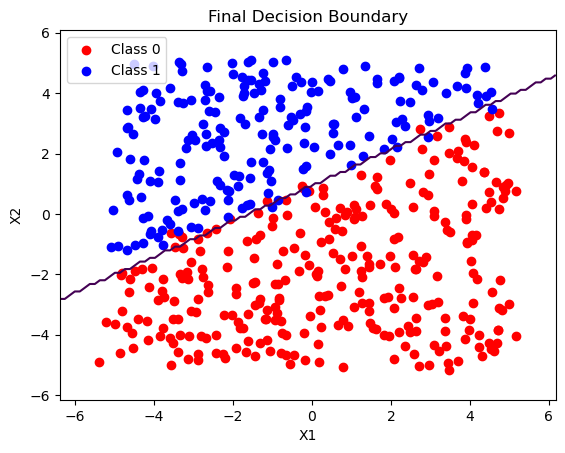

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Find the playground Imagine your data points (red and blue dots) are in a playground.
# We expand the playground slightly (subtracting 1 and adding 1) so that we don’t cut off any points!
x_min,x_max=X1.min()-1,X1.max()+1
y_min,y_max=X2.min()-1,X2.max()+1

# Generate a meshgrid or a chessboard. Think of a chessboard covering the whole playground.We divide the space into 100*100 tiny
# squares. Each square has an (X1, X2) coordinate where we check: Red or Blue?
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) # xx and yy are 2D arrrays created by meshgrid
# np.linspace(start, stop, n): Generates n evenly spaced values between start and stop.


# Check which side of the line we are on .Every square on the chessboard follows this magic rule: 𝑊0+𝑊1⋅𝑋1+𝑊2⋅𝑋2=0
#If Z ≥ 0, it's Class 1 (Blue 🔵)
#If Z < 0, it's Class 0 (Red 🔴)

z=weights[0]+weights[1]*xx+weights[2]*yy  # Decision values at each (X1, X2)
z=z>=0  # Convert to 0 or 1

# draw the dots using a Scatter plot
plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0')
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')

# draw the Magic Line plt.contour() function finds where Z = 0 and draws the black decision boundary line
# This line separates Class 0 and Class 1
plt.contour(xx,yy,z,levels=[0],color='black')
# levels=[0] tells the contour which line to draw. 
# If we wrote levels=[-1, 0, 1], it would draw extra contour lines for Z = -1 and Z = 1 too.
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Final Decision Boundary")
plt.show()





The Perceptron method makes hard classifications (0 or 1), which means:

A small weight change can flip a prediction completely.
It doesn't work well when data is not perfectly separable.
But with the Sigmoid function, we get probabilities between 0 and 1:
✅ Helps in handling overlapping data.
✅ Allows gradient-based optimization (needed for gradient descent).
✅ Gives a confidence score (e.g., 0.9 means high confidence in Class 1)

# Implementing sigmoid 

y pred​= 1+e ^ (−dot product)​ X


In [12]:
for e in range(epoch):
    for i in range(samples):
        x_point=X_data[i]
        actual_y=y[i]
    
        # Calculate y_pred where ypred=1 + 1/e^-z  and z=W0+x1X1+W2X2=np.dot(weights,X1,X2)
        z=np.dot(weights,x_point)
        y_pred = 1 / (1 + np.exp(-z))
    
        # Check if the point is correctly classified or misclassified 
        if (y_pred>=0.5 and actual_y==0) or (y_pred<0.5 and actual_y==1):
            weights += learning_rate * (actual_y - y_pred) * x_point
    print(f"Epoch {e+ 1}/{epoch} completed.")

Epoch 1/1000 completed.
Epoch 2/1000 completed.
Epoch 3/1000 completed.
Epoch 4/1000 completed.
Epoch 5/1000 completed.
Epoch 6/1000 completed.
Epoch 7/1000 completed.
Epoch 8/1000 completed.
Epoch 9/1000 completed.
Epoch 10/1000 completed.
Epoch 11/1000 completed.
Epoch 12/1000 completed.
Epoch 13/1000 completed.
Epoch 14/1000 completed.
Epoch 15/1000 completed.
Epoch 16/1000 completed.
Epoch 17/1000 completed.
Epoch 18/1000 completed.
Epoch 19/1000 completed.
Epoch 20/1000 completed.
Epoch 21/1000 completed.
Epoch 22/1000 completed.
Epoch 23/1000 completed.
Epoch 24/1000 completed.
Epoch 25/1000 completed.
Epoch 26/1000 completed.
Epoch 27/1000 completed.
Epoch 28/1000 completed.
Epoch 29/1000 completed.
Epoch 30/1000 completed.
Epoch 31/1000 completed.
Epoch 32/1000 completed.
Epoch 33/1000 completed.
Epoch 34/1000 completed.
Epoch 35/1000 completed.
Epoch 36/1000 completed.
Epoch 37/1000 completed.
Epoch 38/1000 completed.
Epoch 39/1000 completed.
Epoch 40/1000 completed.
Epoch 41/

Epoch 361/1000 completed.
Epoch 362/1000 completed.
Epoch 363/1000 completed.
Epoch 364/1000 completed.
Epoch 365/1000 completed.
Epoch 366/1000 completed.
Epoch 367/1000 completed.
Epoch 368/1000 completed.
Epoch 369/1000 completed.
Epoch 370/1000 completed.
Epoch 371/1000 completed.
Epoch 372/1000 completed.
Epoch 373/1000 completed.
Epoch 374/1000 completed.
Epoch 375/1000 completed.
Epoch 376/1000 completed.
Epoch 377/1000 completed.
Epoch 378/1000 completed.
Epoch 379/1000 completed.
Epoch 380/1000 completed.
Epoch 381/1000 completed.
Epoch 382/1000 completed.
Epoch 383/1000 completed.
Epoch 384/1000 completed.
Epoch 385/1000 completed.
Epoch 386/1000 completed.
Epoch 387/1000 completed.
Epoch 388/1000 completed.
Epoch 389/1000 completed.
Epoch 390/1000 completed.
Epoch 391/1000 completed.
Epoch 392/1000 completed.
Epoch 393/1000 completed.
Epoch 394/1000 completed.
Epoch 395/1000 completed.
Epoch 396/1000 completed.
Epoch 397/1000 completed.
Epoch 398/1000 completed.
Epoch 399/10

Epoch 703/1000 completed.
Epoch 704/1000 completed.
Epoch 705/1000 completed.
Epoch 706/1000 completed.
Epoch 707/1000 completed.
Epoch 708/1000 completed.
Epoch 709/1000 completed.
Epoch 710/1000 completed.
Epoch 711/1000 completed.
Epoch 712/1000 completed.
Epoch 713/1000 completed.
Epoch 714/1000 completed.
Epoch 715/1000 completed.
Epoch 716/1000 completed.
Epoch 717/1000 completed.
Epoch 718/1000 completed.
Epoch 719/1000 completed.
Epoch 720/1000 completed.
Epoch 721/1000 completed.
Epoch 722/1000 completed.
Epoch 723/1000 completed.
Epoch 724/1000 completed.
Epoch 725/1000 completed.
Epoch 726/1000 completed.
Epoch 727/1000 completed.
Epoch 728/1000 completed.
Epoch 729/1000 completed.
Epoch 730/1000 completed.
Epoch 731/1000 completed.
Epoch 732/1000 completed.
Epoch 733/1000 completed.
Epoch 734/1000 completed.
Epoch 735/1000 completed.
Epoch 736/1000 completed.
Epoch 737/1000 completed.
Epoch 738/1000 completed.
Epoch 739/1000 completed.
Epoch 740/1000 completed.
Epoch 741/10

# Visualizing the Sigmoid Accuracy

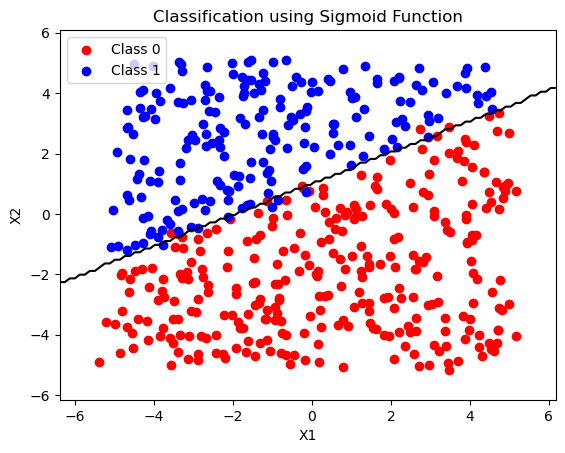

In [13]:
# Create the Playground for the chessboard 
xmin,xmax=X1.min()-1,X1.max()+1
ymin,ymax=X2.min()-1,X2.max()+1

# put the chessboard mat over the playground or create th meshgrid
xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))

# Calulate the magic formula of each square on the paly board W0+w1x1+w2x2=0 and check on which side we are
z = weights[0] + weights[1] * xx + weights[2] * yy
z= 1 / (1 + np.exp(-z))
z=z>=0.5

# Color the points based on Class 1 or Class 0
plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0')
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')

# Draw the magic line which classifies the red and green points into two separate categories
plt.contour(xx,yy,z,levels=[0.5],colors=['black'])


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Classification using Sigmoid Function")
plt.show()


# Implement Loss function
Steps to Implement:
-  Compute predicted probabilities using the sigmoid function.
-  Compute Cross-Entropy Loss.
-  Optimize weights using Gradient Descent

# Why MLE & Cross-Entropy?
-	MLE helps us find the best weights by maximizing the probability of correctly classifying the data.
-	Cross-Entropy Loss is just the negative log of MLE, which we minimize instead.
# Cross-Entropy Loss Formula:
- L = −1/N ∑  [y*log(ypred) + (1−y)* log(1−ypred)]
# This ensures:
- If y = 1, the first term dominates → pushes ypred​ close to 1.
- If y = 0, the second term dominates → pushes ypred​ close to 0.

In [14]:
def cross_entropy_loss(ytrue,ypred):
    return -np.mean(ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred))

In [15]:
for e in range(epoch): # Loop through epoch
    for i in range(samples): # loop through all data points 
        x_points=X_data[i]
        actual_y=y[i]
        
        # Step 1: Compute predicted probability using sigmoid
        z=np.dot(weights,x_points)
        ypred=1/(1+np.exp(-z))
        
        # Step 2: Update weights using gradient descent
        weights+=learning_rate * (actual_y-ypred) * x_points
        
     # Calculate loss per epoch **after processing all points in the epoch**
    loss=cross_entropy_loss(actual_y,ypred)
    print(f"epoch {e+1},Loss {loss}")
    

epoch 1,Loss 0.00438774641703999
epoch 2,Loss 0.002035441603053912
epoch 3,Loss 0.0011354676553885182
epoch 4,Loss 0.0007009026079321788
epoch 5,Loss 0.00046271874359083223
epoch 6,Loss 0.00032065373808952316
epoch 7,Loss 0.00023058247228726543
epoch 8,Loss 0.00017075803510650534
epoch 9,Loss 0.000129534271877902
epoch 10,Loss 0.00010026344475530195
epoch 11,Loss 7.895367651586504e-05
epoch 12,Loss 6.310671315575731e-05
epoch 13,Loss 5.1104257267019615e-05
epoch 14,Loss 4.1866946144022025e-05
epoch 15,Loss 3.465654812089431e-05
epoch 16,Loss 2.895697168390233e-05
epoch 17,Loss 2.440040023357381e-05
epoch 18,Loss 2.0720165210670924e-05
epoch 19,Loss 1.7719943997217117e-05
epoch 20,Loss 1.5253191286863781e-05
epoch 21,Loss 1.3209137824050323e-05
epoch 22,Loss 1.1503093307243777e-05
epoch 23,Loss 1.0069624146674326e-05
epoch 24,Loss 8.857684686278609e-06
epoch 25,Loss 7.827096761315037e-06
epoch 26,Loss 6.945973358998611e-06
epoch 27,Loss 6.188812116313864e-06
epoch 28,Loss 5.535069894260

epoch 237,Loss 3.1913563745745284e-08
epoch 238,Loss 3.179976166324836e-08
epoch 239,Loss 3.168780388331133e-08
epoch 240,Loss 3.1577655322884896e-08
epoch 241,Loss 3.146928089891977e-08
epoch 242,Loss 3.1362646638589766e-08
epoch 243,Loss 3.125771945724715e-08
epoch 244,Loss 3.115446693637807e-08
epoch 245,Loss 3.1052857101557885e-08
epoch 246,Loss 3.0952859532674295e-08
epoch 247,Loss 3.0854443365525764e-08
epoch 248,Loss 3.0757579734312315e-08
epoch 249,Loss 3.0662239218122426e-08
epoch 250,Loss 3.0568393617289986e-08
epoch 251,Loss 3.047601573134963e-08
epoch 252,Loss 3.0385078026769115e-08
epoch 253,Loss 3.029555452432848e-08
epoch 254,Loss 3.0207419244807787e-08
epoch 255,Loss 3.012064709716555e-08
epoch 256,Loss 3.0035213212404916e-08
epoch 257,Loss 2.9951093609707505e-08
epoch 258,Loss 2.9868264752344145e-08
epoch 259,Loss 2.97867031035857e-08
epoch 260,Loss 2.9706386681015312e-08
epoch 261,Loss 2.9627292836082318e-08
epoch 262,Loss 2.9549400030459107e-08
epoch 263,Loss 2.94726

epoch 474,Loss 2.432047182130561e-08
epoch 475,Loss 2.431589703619909e-08
epoch 476,Loss 2.431137865042361e-08
epoch 477,Loss 2.4306916219889955e-08
epoch 478,Loss 2.4302509300508898e-08
epoch 479,Loss 2.429815656001278e-08
epoch 480,Loss 2.42938579984016e-08
epoch 481,Loss 2.42896125054523e-08
epoch 482,Loss 2.4285419415031056e-08
epoch 483,Loss 2.4281278283048646e-08
epoch 484,Loss 2.4277188443371234e-08
epoch 485,Loss 2.4273149007820377e-08
epoch 486,Loss 2.4269159532306862e-08
epoch 487,Loss 2.426521935069685e-08
epoch 488,Loss 2.426132801890112e-08
epoch 489,Loss 2.4257484648741236e-08
epoch 490,Loss 2.425368879612797e-08
epoch 491,Loss 2.4249939572882888e-08
epoch 492,Loss 2.424623697900598e-08
epoch 493,Loss 2.4242579904274202e-08
epoch 494,Loss 2.423896790459833e-08
epoch 495,Loss 2.423540075793375e-08
epoch 496,Loss 2.4231877354057415e-08
epoch 497,Loss 2.4228397470924714e-08
epoch 498,Loss 2.422496066444642e-08
epoch 499,Loss 2.4221566046444098e-08
epoch 500,Loss 2.4218213394

epoch 694,Loss 2.3972874750667665e-08
epoch 695,Loss 2.3972570549551625e-08
epoch 696,Loss 2.397227012319396e-08
epoch 697,Loss 2.3971973249550057e-08
epoch 698,Loss 2.397168015066453e-08
epoch 699,Loss 2.3971390604492767e-08
epoch 700,Loss 2.397110438899016e-08
epoch 701,Loss 2.3970821948245923e-08
epoch 702,Loss 2.397054283817084e-08
epoch 703,Loss 2.3970267058764914e-08
epoch 704,Loss 2.3969994610028143e-08
epoch 705,Loss 2.396972549196052e-08
epoch 706,Loss 2.3969459704562057e-08
epoch 707,Loss 2.3969197247832742e-08
epoch 708,Loss 2.3968937899727973e-08
epoch 709,Loss 2.396868166024775e-08
epoch 710,Loss 2.396842852939207e-08
epoch 711,Loss 2.3968178507160928e-08
epoch 712,Loss 2.3967931593554335e-08
epoch 713,Loss 2.3967687788572284e-08
epoch 714,Loss 2.3967446648125556e-08
epoch 715,Loss 2.3967208616303372e-08
epoch 716,Loss 2.396697369310573e-08
epoch 717,Loss 2.3966741434443413e-08
epoch 718,Loss 2.3966511840316418e-08
epoch 719,Loss 2.3966285354813965e-08
epoch 720,Loss 2.396

epoch 934,Loss 2.394922144856127e-08
epoch 935,Loss 2.3949205239304722e-08
epoch 936,Loss 2.3949189474137395e-08
epoch 937,Loss 2.3949173708970065e-08
epoch 938,Loss 2.394915816584735e-08
epoch 939,Loss 2.3949142844769242e-08
epoch 940,Loss 2.3949127745735747e-08
epoch 941,Loss 2.394911286874686e-08
epoch 942,Loss 2.3949097991757972e-08
epoch 943,Loss 2.3949083558858308e-08
epoch 944,Loss 2.394906912595864e-08
epoch 945,Loss 2.3949054915103588e-08
epoch 946,Loss 2.394904092629314e-08
epoch 947,Loss 2.3949026937482695e-08
epoch 948,Loss 2.394901317071686e-08
epoch 949,Loss 2.3948999625995634e-08
epoch 950,Loss 2.394898630331902e-08
epoch 951,Loss 2.3948973202687016e-08
epoch 952,Loss 2.394896010205501e-08
epoch 953,Loss 2.3948947223467618e-08
epoch 954,Loss 2.3948934566924833e-08
epoch 955,Loss 2.394892191038205e-08
epoch 956,Loss 2.3948909475883878e-08
epoch 957,Loss 2.3948897263430312e-08
epoch 958,Loss 2.394888505097675e-08
epoch 959,Loss 2.3948873060567796e-08
epoch 960,Loss 2.39488

# Applying Gradient Descent to minimize the Loss over epochs

# W=W+η∑(ytrue −ypred )X

In [16]:
for e in range(epoch):  # Loop thorugh Epochs
    y_preds=[]
    for i in range(samples): # loop through all data points
        x_points=X_data[i]
        y_true=y[i]
        
        # Step 1: Compute predicted probability using sigmoid
        z=np.dot(weights,x_points)
        y_pred=1/(1+np.exp(-z))
        
        # Store the prediction in y_preds
        y_preds.append(y_pred)
        
        # Update the weights using Gradient descent
        weights+=learning_rate*(y_true-y_pred)*x_points
        
    # Convert the predictions into a numpy array 
    y_preds=np.array(y_preds)
    
    # Calculate loss per epoch **after processing all points in the epoch**
    loss=cross_entropy_loss(y,y_preds)
    print(f"epoch {e+1},Loss {loss}")
    

epoch 1,Loss nan
epoch 2,Loss nan
epoch 3,Loss nan
epoch 4,Loss nan
epoch 5,Loss nan
epoch 6,Loss nan


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_18712\3810114557.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.mean(ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred))
C:\Users\Tanvi\AppData\Local\Temp\ipykernel_18712\3810114557.py:2: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred))


epoch 7,Loss nan
epoch 8,Loss nan
epoch 9,Loss nan
epoch 10,Loss nan
epoch 11,Loss nan
epoch 12,Loss nan
epoch 13,Loss nan
epoch 14,Loss nan
epoch 15,Loss nan
epoch 16,Loss nan
epoch 17,Loss nan
epoch 18,Loss nan
epoch 19,Loss nan
epoch 20,Loss nan
epoch 21,Loss nan
epoch 22,Loss nan
epoch 23,Loss nan
epoch 24,Loss nan
epoch 25,Loss nan
epoch 26,Loss nan
epoch 27,Loss nan
epoch 28,Loss nan
epoch 29,Loss nan
epoch 30,Loss nan
epoch 31,Loss nan
epoch 32,Loss nan
epoch 33,Loss nan
epoch 34,Loss nan
epoch 35,Loss nan
epoch 36,Loss nan
epoch 37,Loss nan
epoch 38,Loss nan
epoch 39,Loss nan
epoch 40,Loss nan
epoch 41,Loss nan
epoch 42,Loss nan
epoch 43,Loss nan
epoch 44,Loss nan
epoch 45,Loss nan
epoch 46,Loss nan
epoch 47,Loss nan
epoch 48,Loss nan
epoch 49,Loss nan
epoch 50,Loss nan
epoch 51,Loss nan
epoch 52,Loss nan
epoch 53,Loss nan
epoch 54,Loss nan
epoch 55,Loss nan
epoch 56,Loss nan
epoch 57,Loss nan
epoch 58,Loss nan
epoch 59,Loss nan
epoch 60,Loss nan
epoch 61,Loss nan
epoch 62,Loss

epoch 479,Loss nan
epoch 480,Loss nan
epoch 481,Loss nan
epoch 482,Loss nan
epoch 483,Loss nan
epoch 484,Loss nan
epoch 485,Loss nan
epoch 486,Loss nan
epoch 487,Loss nan
epoch 488,Loss nan
epoch 489,Loss nan
epoch 490,Loss nan
epoch 491,Loss nan
epoch 492,Loss nan
epoch 493,Loss nan
epoch 494,Loss nan
epoch 495,Loss nan
epoch 496,Loss nan
epoch 497,Loss nan
epoch 498,Loss nan
epoch 499,Loss nan
epoch 500,Loss nan
epoch 501,Loss nan
epoch 502,Loss nan
epoch 503,Loss nan
epoch 504,Loss nan
epoch 505,Loss nan
epoch 506,Loss nan
epoch 507,Loss nan
epoch 508,Loss nan
epoch 509,Loss nan
epoch 510,Loss nan
epoch 511,Loss nan
epoch 512,Loss nan
epoch 513,Loss nan
epoch 514,Loss nan
epoch 515,Loss nan
epoch 516,Loss nan
epoch 517,Loss nan
epoch 518,Loss nan
epoch 519,Loss nan
epoch 520,Loss nan
epoch 521,Loss nan
epoch 522,Loss nan
epoch 523,Loss nan
epoch 524,Loss nan
epoch 525,Loss nan
epoch 526,Loss nan
epoch 527,Loss nan
epoch 528,Loss nan
epoch 529,Loss nan
epoch 530,Loss nan
epoch 531,Lo

epoch 915,Loss nan
epoch 916,Loss nan
epoch 917,Loss nan
epoch 918,Loss nan
epoch 919,Loss nan
epoch 920,Loss nan
epoch 921,Loss nan
epoch 922,Loss nan
epoch 923,Loss nan
epoch 924,Loss nan
epoch 925,Loss nan
epoch 926,Loss nan
epoch 927,Loss nan
epoch 928,Loss nan
epoch 929,Loss nan
epoch 930,Loss nan
epoch 931,Loss nan
epoch 932,Loss nan
epoch 933,Loss nan
epoch 934,Loss nan
epoch 935,Loss nan
epoch 936,Loss nan
epoch 937,Loss nan
epoch 938,Loss nan
epoch 939,Loss nan
epoch 940,Loss nan
epoch 941,Loss nan
epoch 942,Loss nan
epoch 943,Loss nan
epoch 944,Loss nan
epoch 945,Loss nan
epoch 946,Loss nan
epoch 947,Loss nan
epoch 948,Loss nan
epoch 949,Loss nan
epoch 950,Loss nan
epoch 951,Loss nan
epoch 952,Loss nan
epoch 953,Loss nan
epoch 954,Loss nan
epoch 955,Loss nan
epoch 956,Loss nan
epoch 957,Loss nan
epoch 958,Loss nan
epoch 959,Loss nan
epoch 960,Loss nan
epoch 961,Loss nan
epoch 962,Loss nan
epoch 963,Loss nan
epoch 964,Loss nan
epoch 965,Loss nan
epoch 966,Loss nan
epoch 967,Lo

# Visualizing 

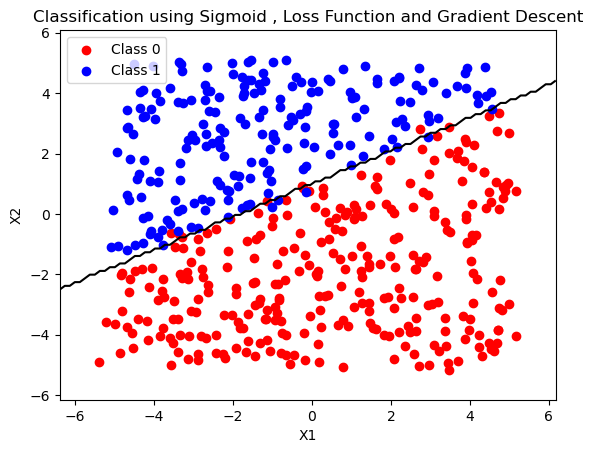

In [17]:
# create the playground 
xmin,xmax=X1.min()-1,X1.max()+1
ymin,ymax=X2.min()-1,X2.max()+1

# create meshgrid or chessboard
xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))


# calculate magic formula for each box on the chessboard
z = weights[0] + weights[1] * xx + weights[2] * yy
z = 1 / (1 + np.exp(-z))
# check which side of the chessboard we are on
z=z>=0.5

# Create a scatter plot for Class 1 and Class 2 points 
plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0')
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')
            
# Draw magic line 
plt.contour(xx,yy,z,levels=[0.5],colors=['black'])
            

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Classification using Sigmoid , Loss Function and Gradient Descent")
plt.show()


# Splitting the Data into Train Test


Imagine you have a big jar of mixed candies 🍬, and you want to test how good you are at guessing the flavors.

- X_data, y → This is your full jar of candies (your dataset).
train_test_split → You take 80% of the candies to practice (train) and 20% to test if you really learned the flavors.
random_state=42 → This makes sure that every time you split the candies, you get the same ones in train and test, so your results are consistent.
-So, after splitting:

- X_train, y_train → The candies you practice with (train data).
- X_test, y_test → The candies you test yourself with (test data).

In [18]:
# Before applying the classification metrics we need to split the data to train and test. 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_data,y,test_size=0.2,random_state=32)

In [19]:
X_train

array([[ 1.        ,  0.211081  , -3.17895571],
       [ 1.        ,  1.27340157, -2.96227639],
       [ 1.        , -2.59703836,  3.40977911],
       ...,
       [ 1.        , -4.98352846, -3.64839438],
       [ 1.        ,  4.56369407,  3.46229096],
       [ 1.        ,  4.00311709, -3.48542754]])

# Implementing Classification Metrics

# 1. Accuracy

In [20]:
# Step 1: Calculate Predictions / Probabilities. using the sigmoid function 1/1+e^-z will give us the probabilities 
# np.dot(X_test, weights) → This combines the test data (X_test) with the trained weights to make a raw guess (z).
y_pred_test=1/(1+np.exp(-np.dot(X_test,weights)))
# 1/1+np.exp(-z) gives us the probabilities .

# Convert Probabilities to labels 
y_pred_labels=(y_pred_test>=0.5).astype(int)


In [21]:
# Calculating Accuracy
accuracy=np.mean(y_pred_labels==Y_test)
print(f"Accuracy: {accuracy:}")
# y_test → These are the correct answers (like an answer key ).
# y_pred → These are the kid’s answers (your model’s predictions.
# y_pred == y_test → This checks which answers are correct .
# np.mean(...) → It calculates how many answers were correct out of all questions (correct/total),
# giving you a score between 0 and 1.

Accuracy: 0.95


# 2. Confusion Matrix

True Positive    |    False Negative 

False Positive   |    True Negative

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix=confusion_matrix(y_pred_labels,Y_test)
print(confusion_matrix)

[[57  3]
 [ 2 38]]


Observation : False Negative value has 1 point which is incorrectly classified . Its true value was positive but it was predicted as negative

# Vislualizing the same using seaborn

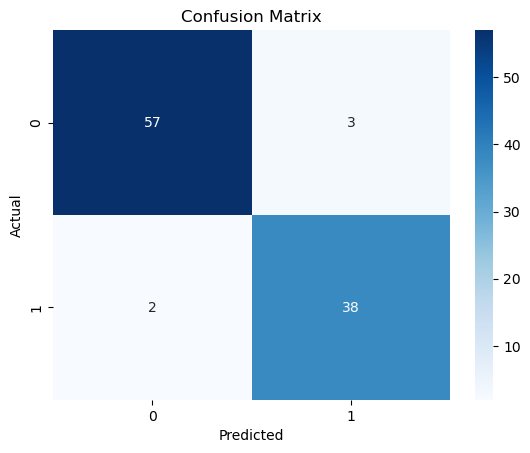

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In the heatmap darker shades represent a higher count. Smaller numbers have a lighter shade of blue.If a cell is almost white, it means that value is very small or zero.

# Calculating Precision , Recall and F1 SCore 

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision=precision_score(y_pred_labels,Y_test)
recall=recall_score(y_pred_labels,Y_test)
f1_score=f1_score(y_pred_labels,Y_test)

print('Precision = ',precision)
print('Recall = ',recall)
print('f1_score = ',f1_score)

Precision =  0.926829268292683
Recall =  0.95
f1_score =  0.9382716049382716


The precision, recall and f1_score are quite high which means that the model is doing well in minimizing false positives and
false negatives.F1-score 0.938, means that the model has a good balance between precision and recall.